In [30]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [31]:
# load and look at first five rows/observations
df = pd.read_csv('survey_results_public.csv').set_index('Respondent')
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [32]:
# number of rows/observations and columns
df.shape

(88883, 84)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 84 columns):
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61159 non-null object
MgrMoney                  6

In [34]:
df.isna().sum()[df.isna().sum() == 0].keys()

Index(['Hobbyist', 'OpenSourcer'], dtype='object')

# a. Average age of developers when they wrote their first line of code

In [109]:
def average_age_of_first_line_code(Age1stCode):
    # Drop NA/NaN observations of Age1stCode
    Age_df = Age1stCode.dropna()
    responses = Age_df.count()
    # Convert Object to integer
    age_old = ('Younger than 5 years','Older than 85')
    age_new = (4, 87)
    Age_df = pd.to_numeric(Age_df.replace(age_old, age_new))
    Age_df.plot(kind='hist', title=f'From {responses} responses', label= f'Average Age: {int(round(Age_df.mean()))} to {int(round(Age_df.mean()+1))}')
    plt.xlabel('Age')
    plt.legend()
    return Age_df.mean()

15.41

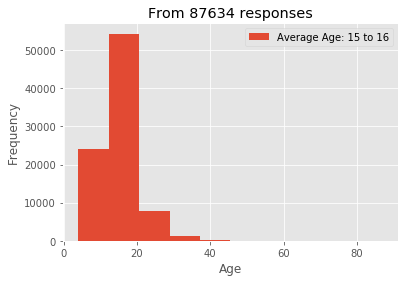

In [110]:
round(average_age_of_first_line_code(df['Age1stCode']),3)

<h2>Average age of developers from 87634 responses(They wrote first line of code) : 15 - 16</h2>
<hr>

#  b. Percentage of developers who know python in each country

In [37]:
# Checking NA/null values
df['LanguageWorkedWith'].isna().sum()

1314

In [114]:
languageworked_df = df[['LanguageWorkedWith','Country']].dropna()
res = languageworked_df.count()[0]

In [39]:
languageworked_df.isna().sum()

LanguageWorkedWith    0
Country               0
dtype: int64

In [40]:
languageworked_df['LanguageWorkedWith'] = languageworked_df.LanguageWorkedWith + ';'
languageworked_df

,LanguageWorkedWith,Country
Respondent,,
1,HTML/CSS;Java;JavaScript;Python;,United Kingdom
2,C++;HTML/CSS;Python;,Bosnia and Herzegovina
3,HTML/CSS;,Thailand
4,C;C++;C#;Python;SQL;,United States
5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA;,Ukraine
...,...,...
88182,HTML/CSS;Java;JavaScript;,Pakistan
88212,HTML/CSS;JavaScript;Python;,Spain
88282,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...,United States


In [41]:
languageworked_df = languageworked_df.groupby('Country').sum()
languageworked_df

,LanguageWorkedWith
Country,
Afghanistan,Java;HTML/CSS;JavaScript;PHP;Assembly;C;Clojur...
Albania,HTML/CSS;JavaScript;PHP;HTML/CSS;Java;JavaScri...
Algeria,HTML/CSS;JavaScript;PHP;VBA;Assembly;C;C#;HTML...
Andorra,Assembly;C;C++;C#;Other(s):;Assembly;Bash/Shel...
Angola,C;HTML/CSS;JavaScript;PHP;Python;Ruby;HTML/CSS...
...,...
"Venezuela, Bolivarian Republic of...",HTML/CSS;JavaScript;PHP;SQL;Bash/Shell/PowerSh...
Viet Nam,HTML/CSS;JavaScript;PHP;HTML/CSS;JavaScript;Ty...
Yemen,HTML/CSS;JavaScript;PHP;SQL;TypeScript;C#;SQL;...


In [42]:
def python_developers_count(languageworked_df):
    countries_python = {}
    countries_developer = {}
    for country,languages in zip(languageworked_df.index, languageworked_df['LanguageWorkedWith']):
        count = 0
        for language in languages.split(';'):
            count += 1
            if language in ['Python', 'python', 'PYTHON']:
                if country not in countries_python.keys():
                    countries_python[country] = 1
                else:
                    countries_python[country] += 1
        if country not in countries_python.keys():
            countries_python[country] = 0
        countries_developer[country] = count
    return countries_python, countries_developer

In [43]:
py_dev, dev = python_developers_count(languageworked_df)

In [44]:
columns = ['python_developers_count', 'total developers_count', 'python_developers_percentage']
def python_developers_percent(py_dev, dev):
    py_percent = pd.DataFrame.from_dict(py_dev, orient='index', dtype=None, columns=[columns[0]])
    py_percent[columns[1]] = dev.values()
    py_percent[columns[2]] = (py_percent[columns[0]] / py_percent[columns[1]]) * 100
    return py_percent

In [45]:
py_dev_percentage = python_developers_percent(py_dev, dev)

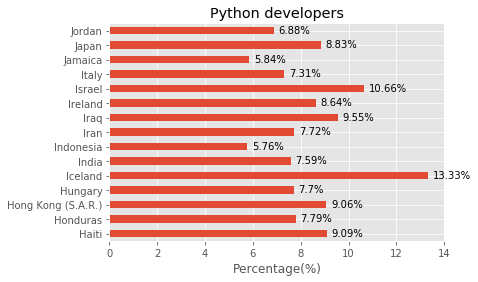

In [46]:
ax = py_dev_percentage[columns[2]][65:80].plot(kind='barh', title='Python developers')
ax.set_xlabel('Percentage(%)')
for i in ax.patches:
        ax.text(i.get_width()+.2, i.get_y()+.1, str(round(i.get_width(), 2)) + '%')

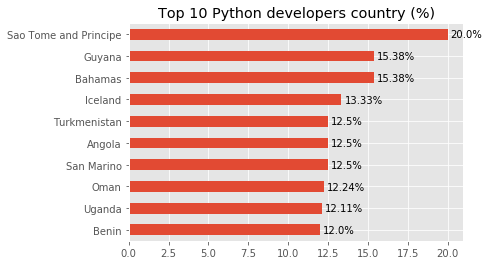

In [47]:
top = py_dev_percentage.sort_values(by=columns[2], ascending=False).head(10)[columns[2]]
ax = top.sort_values(ascending=True).plot(kind='barh', title='Top 10 Python developers country (%)')
for i in ax.patches:
        ax.text(i.get_width()+.2, i.get_y()+.1, str(round(i.get_width(), 2)) + '%')

# 3. Average salary of developer based on continent

In [48]:
salaries_df = df[['Country','ConvertedComp']]
# Lets check for missing values in salaries_df
salaries_df.isnull().sum()

Country            132
ConvertedComp    33060
dtype: int64

In [49]:
# drop rows with missing values from salaries df
clean_salaries_df = salaries_df.dropna().reset_index()
clean_salaries_df.head()

,Respondent,Country,ConvertedComp
0,3,Thailand,8820.0
1,4,United States,61000.0
2,6,Canada,366420.0
3,9,New Zealand,95179.0
4,10,India,13293.0


In [50]:
import pycountry_convert as pc

def country_to_continent(country):
    country_from = ('Hong Kong (S.A.R.)', 'Venezuela, Bolivarian Republic of...', 'The former Yugoslav Republic of Macedonia', 
                    'Libyan Arab Jamahiriya', 'Republic of Korea', 'Congo, Republic of the...')
    country_to = ('Hong Kong', 'Venezuela', 'Macedonia', 'Libya', 'South Korea', 'Congo')
    if country == 'Other Country (Not Listed Above)':
        return 'Not Mentioned'
    if country == 'Timor-Leste':
        return 'Asia'
    if country in country_from:
        country = country_to[country_from.index(country)]
    return pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country)))

In [51]:
clean_salaries_df['Continent'] = clean_salaries_df.Country.apply(country_to_continent)
clean_salaries_df

,Respondent,Country,ConvertedComp,Continent
0,3,Thailand,8820.0,Asia
1,4,United States,61000.0,North America
2,6,Canada,366420.0,North America
3,9,New Zealand,95179.0,Oceania
4,10,India,13293.0,Asia
...,...,...,...,...
55818,88878,United States,130000.0,North America
55819,88879,Finland,82488.0,Europe
55820,88881,Austria,68745.0,Europe
55821,88882,Netherlands,588012.0,Europe


In [52]:
# Lets make a count of developer by continent
clean_salaries_df.Continent.value_counts().reset_index()

,index,Continent
0,Europe,23756
1,North America,18010
2,Asia,8649
3,South America,2484
4,Oceania,1606
5,Africa,1257
6,Not Mentioned,61


In [119]:
def salary_avg_plot(clean_salaries_df):
    # now lets plot salary distributions for the continents
    fig = plt.figure(figsize=(15,10))
    continents = clean_salaries_df['Continent'].value_counts().sort_values(ascending=False)[:6].index.tolist()

    for i,continent in enumerate(continents):
        plt.subplot(2,3,i+1)
        temp_salaries = clean_salaries_df.loc[clean_salaries_df['Continent']==continent,'ConvertedComp']
        
        ax = temp_salaries.plot(kind='kde')
        ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
        ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(temp_salaries.mean(),0)), fontsize = 12)
        ax.set_xlabel(f'Annual Salary in USD => {temp_salaries.count()} responses')
        ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())

        ax.set_title('Annual Salary Distribution in {}'.format(continent))

    plt.tight_layout()
    plt.savefig('developer_salaries_by_continent.png',bbox_inches = 'tight')
    plt.show()

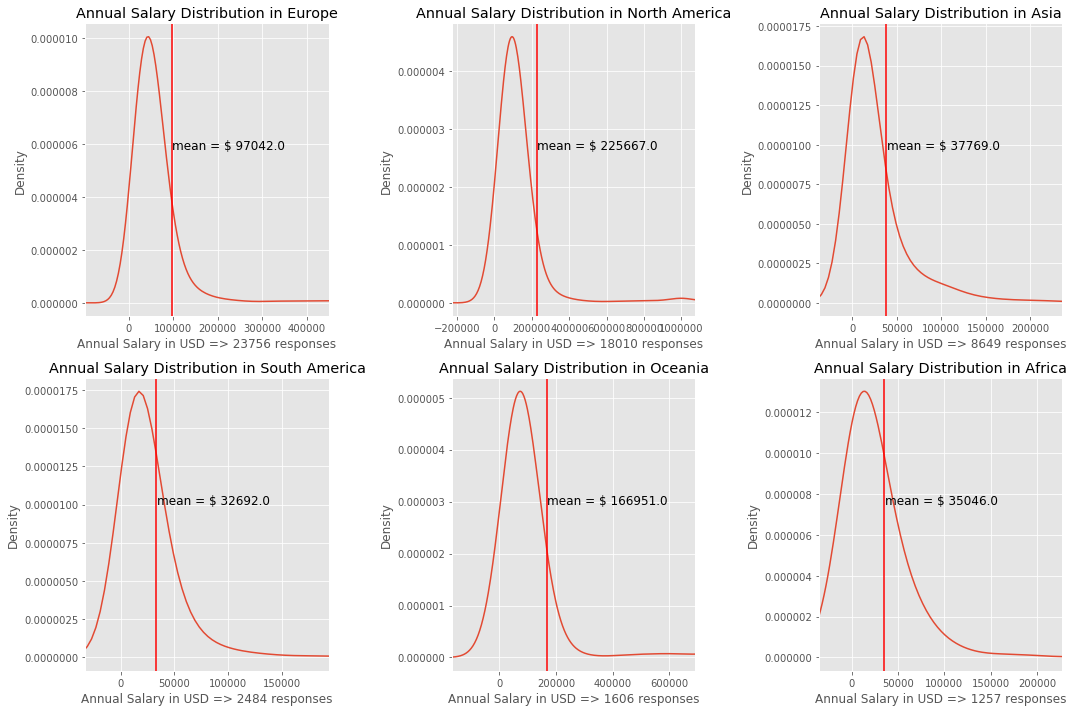

In [120]:
salary_avg_plot(clean_salaries_df)

# 4. Most desired programming language for the year 2020?

In [55]:
df['LanguageDesireNextYear'].isna().sum()

4795

In [122]:
desireLanguage_df = df.LanguageDesireNextYear.dropna()
res = desireLanguage_df.count()

In [57]:
# develop a function that will be used for plotting bar graphs (horizontal)
def plot_dimension_count(unique_dim_dict, plot_title):
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)
    
    ax = dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title)
    for i in ax.patches:
        ax.text(i.get_width()+.2, i.get_y()+.1, str(round((i.get_width()/84088) * 100, 2)) + '%')

In [123]:
def desire_languages_2020():
    desire_languages = {}
    # split the languages on ;
    for language_set in desireLanguage_df.apply(lambda row: str(row).split(';')):
        for language in language_set:
            if language not in desire_languages.keys():
                desire_languages[language] = 1
            else:
                desire_languages[language] += 1
    plot_dimension_count(desire_languages, f'Most desired programming language for the year 2020 ({res} responses) ')

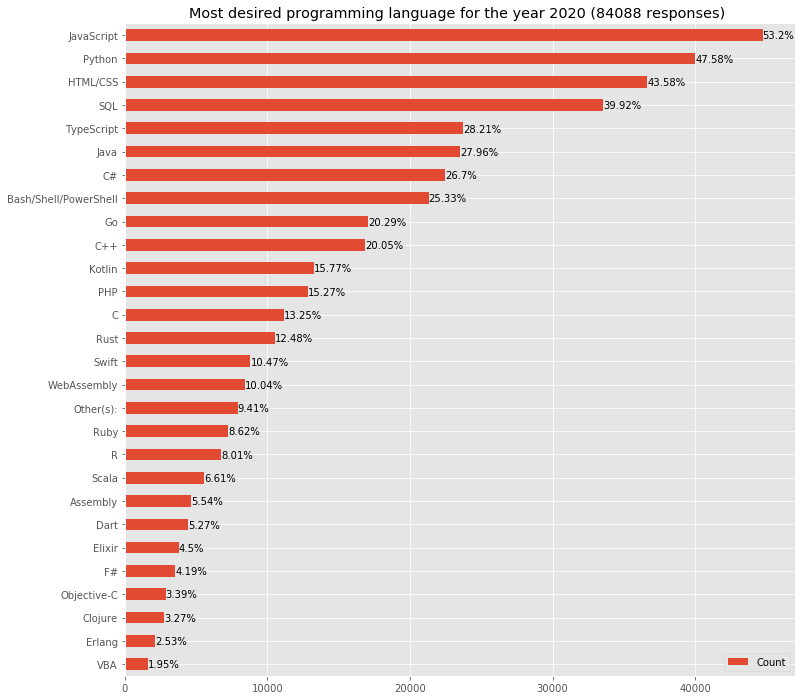

In [124]:
desire_languages_2020()

# 5. Distribution of people who code as a hobby based on gender and continent

In [60]:
hobby_df = df[['Hobbyist', 'Gender', 'Country']]
hobby_df

,Hobbyist,Gender,Country
Respondent,,,
1,Yes,Man,United Kingdom
2,No,Man,Bosnia and Herzegovina
3,Yes,Man,Thailand
4,No,Man,United States
5,Yes,Man,Ukraine
...,...,...,...
88377,Yes,Man,Canada
88601,No,NaN,NaN
88802,No,NaN,NaN


In [61]:
# Lets check for missing values in salaries_df
hobby_df.isnull().sum()

Hobbyist       0
Gender      3477
Country      132
dtype: int64

In [125]:
hobby_df = hobby_df.dropna()
res = hobby_df.count()[0]

In [63]:
hobby_df.Gender.value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [64]:
def gender_rearrange(gender_df):
    # Gender Transformation
    gender_old = gender_df.Gender.unique().tolist()[2:]
    gender_df.Gender.replace(gender_old, 'Others', inplace=True)

In [65]:
gender_rearrange(hobby_df)
hobby_df.Gender.value_counts()

Man       77919
Woman      6344
Others     1143
Name: Gender, dtype: int64

In [66]:
temp = hobby_df.loc[hobby_df['Gender'] == 'Man', 'Hobbyist'].value_counts()
temp = temp.astype(float)
temp

Yes    63619.0
No     14300.0
Name: Hobbyist, dtype: float64

In [67]:
hobby_df['Continent'] = hobby_df.Country.apply(country_to_continent)
hobby_df.head()

,Hobbyist,Gender,Country,Continent
Respondent,,,,
1,Yes,Man,United Kingdom,Europe
2,No,Man,Bosnia and Herzegovina,Europe
3,Yes,Man,Thailand,Asia
4,No,Man,United States,North America
5,Yes,Man,Ukraine,Europe


In [68]:
hobby_df.Continent.value_counts()

Europe           34816
North America    24574
Asia             17443
South America     3464
Africa            2649
Oceania           2345
Not Mentioned      115
Name: Continent, dtype: int64

In [135]:
def code_as_a_hobby(hobby_df, column):
    fig = plt.figure(figsize=(15,10))
    for i, value in enumerate(hobby_df[column].unique()):
        plt.subplot(3,3,i+1)
        temp = hobby_df.loc[hobby_df[column] == value, 'Hobbyist'].value_counts()
        res = temp.sum()
        Yes = temp.Yes/temp.sum() * 100
        No = temp.No/temp.sum() * 100
        temp['Yes'], temp['No'] = Yes, No
        ax = temp.plot(kind='bar', color=['g','b'])
        ax.set_title(f'Code as a hobby in Percentage ({value})')
        plt.xlabel(f'{res} responses')

    plt.tight_layout()
    plt.show()

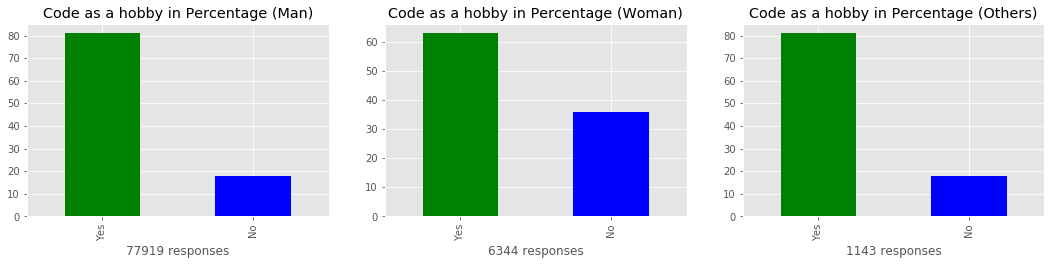

In [136]:
code_as_a_hobby(hobby_df, column='Gender')

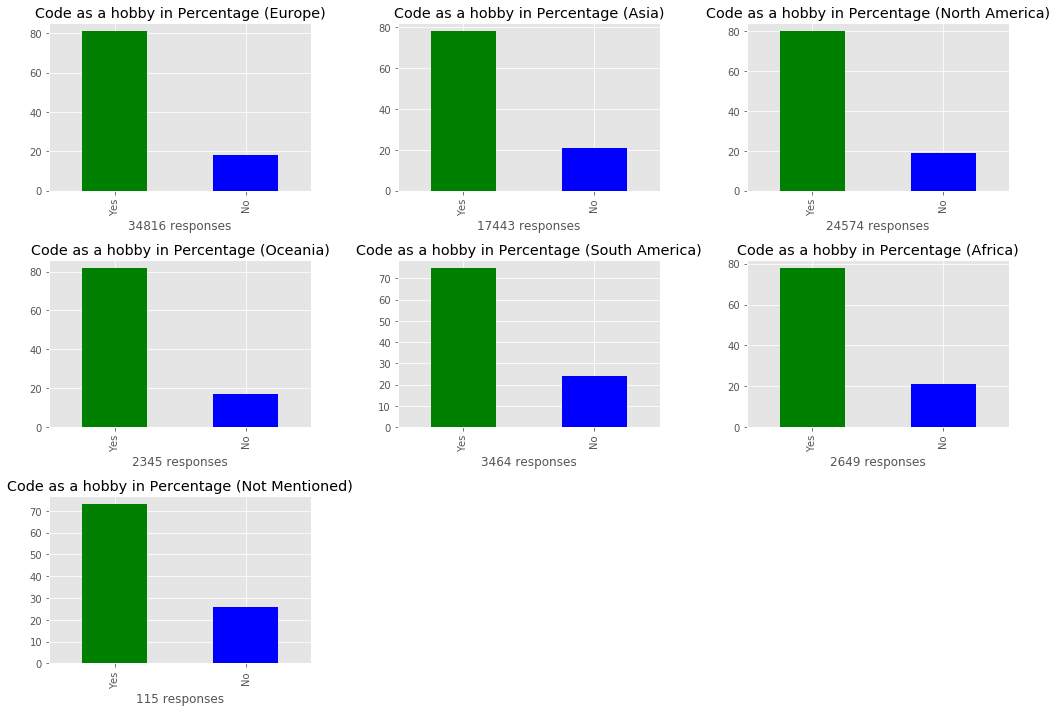

In [137]:
code_as_a_hobby(hobby_df, column='Continent')

# 6. Report for job and career satisfaction of developer based on their gender and continent

In [72]:
job_career_df = df[['CareerSat', 'JobSat', 'Gender', 'Country']]
job_career_df

,CareerSat,JobSat,Gender,Country
Respondent,,,,
1,NaN,NaN,Man,United Kingdom
2,NaN,NaN,Man,Bosnia and Herzegovina
3,Slightly satisfied,Slightly satisfied,Man,Thailand
4,Very satisfied,Slightly satisfied,Man,United States
5,Very dissatisfied,Slightly dissatisfied,Man,Ukraine
...,...,...,...,...
88377,NaN,NaN,Man,Canada
88601,NaN,NaN,NaN,NaN
88802,NaN,NaN,NaN,NaN


In [73]:
job_career_df.isna().sum()

CareerSat    16036
JobSat       17895
Gender        3477
Country        132
dtype: int64

In [74]:
clean_job_career_df = job_career_df.dropna()

In [75]:
# Gender Transformation
gender_rearrange(clean_job_career_df)

In [76]:
def job_career_sat_plot(title, column):
    fig = plt.figure(figsize=(15,10))
    for i, gender in enumerate(clean_job_career_df.Gender.unique()):
        plt.subplot(2,2,i+1)
        temp = clean_job_career_df.loc[clean_job_career_df['Gender'] == gender][column].value_counts()
        ax = temp.plot(kind='pie', autopct='%1.2f%%')
        ax.axis('equal')
        ax.set_title(f'{title} ({gender}) => {temp.sum()} responses')

    plt.tight_layout()
    plt.show()

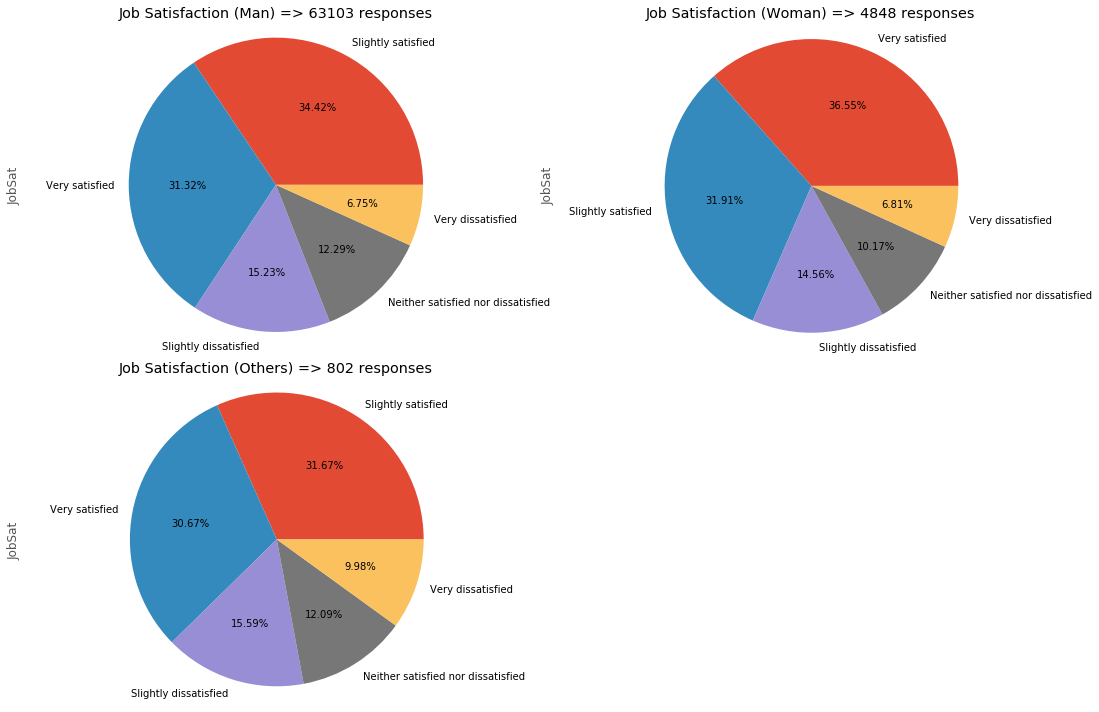

In [77]:
job_career_sat_plot(title='Job Satisfaction', column='JobSat')

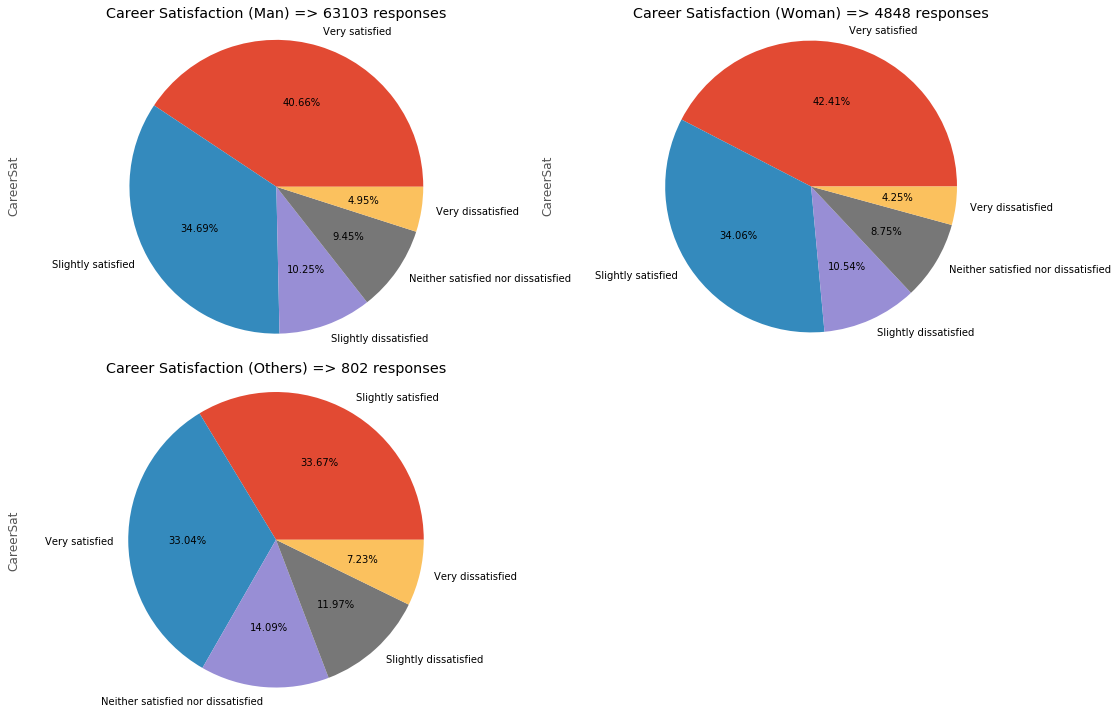

In [78]:
job_career_sat_plot(title='Career Satisfaction', column='CareerSat')

In [79]:
clean_job_career_df['Continent'] = clean_job_career_df.Country.apply(country_to_continent)
clean_job_career_df.head()

,CareerSat,JobSat,Gender,Country,Continent
Respondent,,,,,
3,Slightly satisfied,Slightly satisfied,Man,Thailand,Asia
4,Very satisfied,Slightly satisfied,Man,United States,North America
5,Very dissatisfied,Slightly dissatisfied,Man,Ukraine,Europe
6,Very satisfied,Slightly satisfied,Man,Canada,North America
7,Slightly satisfied,Neither satisfied nor dissatisfied,Man,Ukraine,Europe


In [80]:
def job_career_sat_plot_based_continent(title, column):
    fig = plt.figure(figsize=(15,10))
    for i, continent in enumerate(clean_job_career_df.Continent.unique()[:-1]):
        plt.subplot(3,2,i+1)
        temp = clean_job_career_df.loc[clean_job_career_df['Continent'] == continent][column].value_counts()
        ax = temp.plot(kind='pie', autopct='%1.2f%%')
        ax.axis('equal')
        ax.set_title(f'{title} ({continent}) => {temp.sum()} responses')

    plt.tight_layout()
    plt.show()

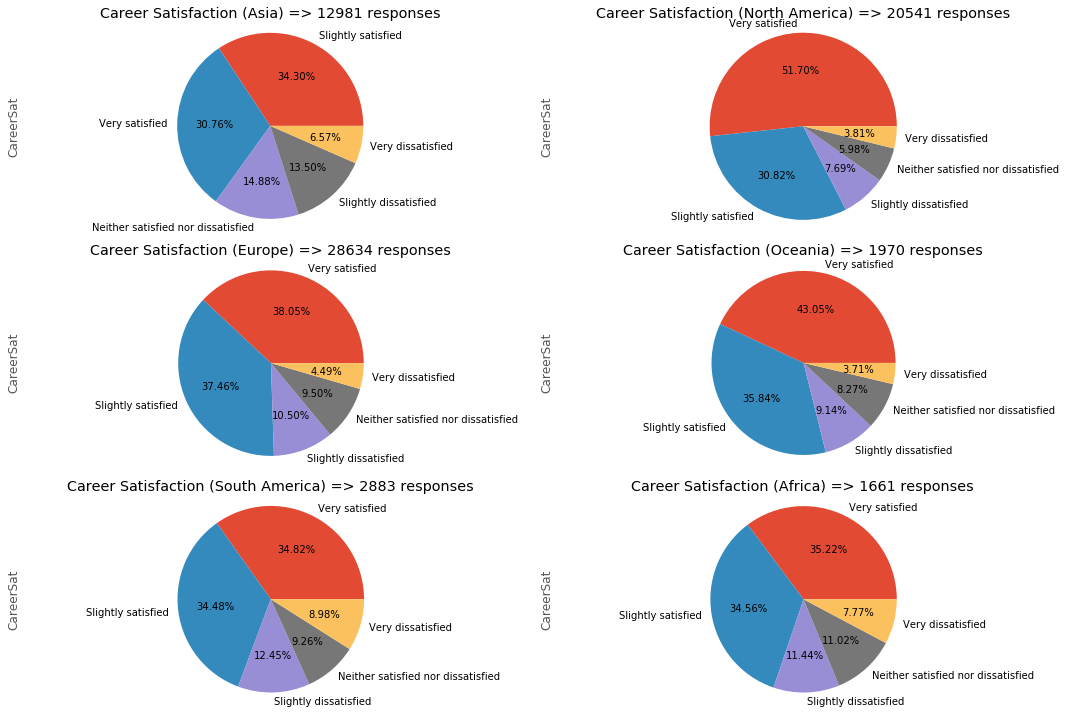

In [81]:
job_career_sat_plot_based_continent(title='Career Satisfaction', column='CareerSat')

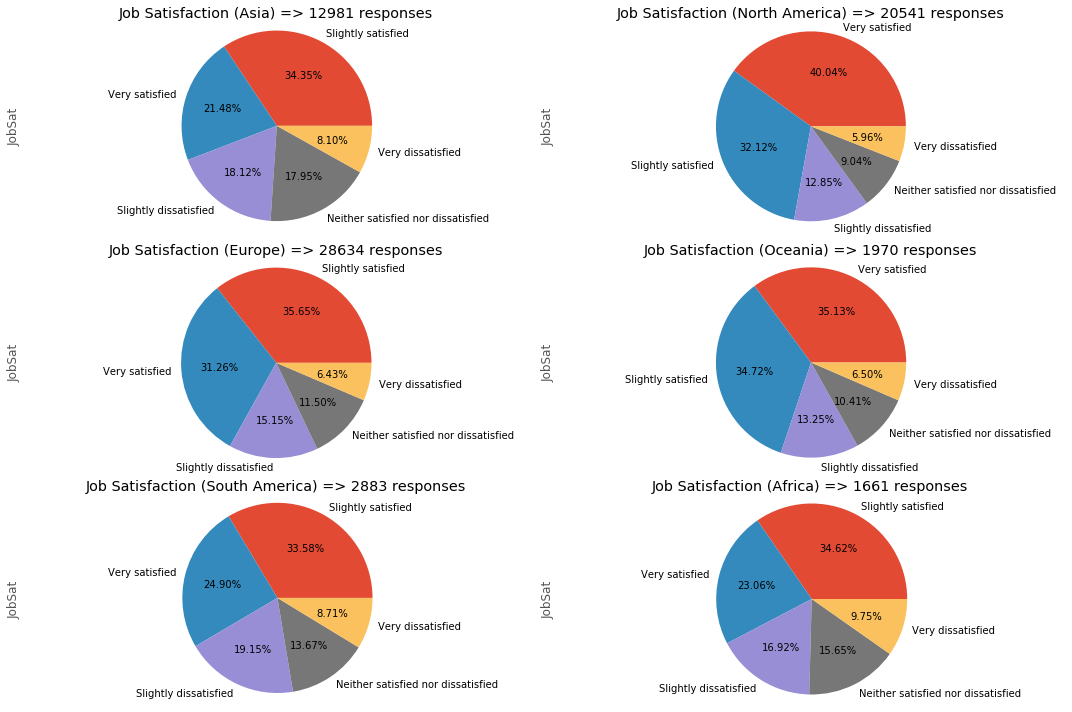

In [82]:
job_career_sat_plot_based_continent(title='Job Satisfaction', column='JobSat')